# <center><span style="font-family: 'Georgia', sans-serif; font-size: 30px; color: #bd0936;">🍔 Zomato EDA: Consumer Trends & Service Strategy</span></center>



## Objective
To analyze Zomato’s restaurant data using exploratory data analysis and visualization to uncover trends in customer behavior, pricing, and service modes — providing insights into restaurant performance, rating patterns, and strategic opportunities for business growth.

### About ZOMATO
Zomato serves an average of 17.5 million monthly transacting customers through its food delivery platform. Its network of active restaurant partners has grown by 8.7% year-on-year — from 208,000 to 226,000.
In this project, you take on the role of a data professional at Zomato, tasked with analyzing customer data through EDA and visualization to uncover meaningful patterns and insights.

### Research Questions: 
   - What type of restaurant do the majority of customers order from?
   - How many votes has each type of restaurant received from customers?
   - What are the ratings that the majority of restaurants have received?
   - Zomato has observed that most couples order most of their food online. What is their average spending on each order?
   - Which mode (online or offline) has received the maximum rating?
   - Which type of restaurant received more offline orders, so that Zomato can offer those customers some good deals?

## Import Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Zomato data .csv', lineterminator='\n')

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## Dataset Overview
The Zomato dataset contains information about partner restaurants on Zomato's platform.
Key columns include:

- `name`: Restaurant name 
- `online_order`: Mode of order (Yes = Online, No = Offline)
- `book_table`: Booked table (Yes = booked, No = Not booked)
- `rate`: Restaurant rating out of 5
- `votes`: # of votes
- `approx_cost(for two people)`: # approax cost/order
- `listed_in(type)`: Type of restaurant

In [4]:
df.shape

(148, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [7]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Data Cleaning & Preprocessing

#####  Format and convert the datatype of column 'rate'

In [8]:
df['rate']=df['rate'].str.split('/').str.get(0)
df['rate'] = df['rate'].astype(float)

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
print(df['rate'].dtype)

float64


#####  Check missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There are no NULL values in our dataframe.

## 📌Question-by-Question Analysis

### Q1: What type of restaurant do the majority of customers order from? 

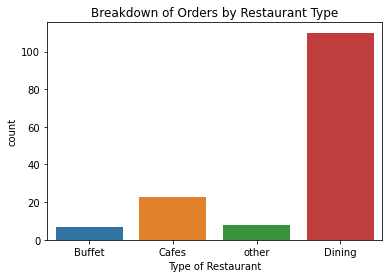

In [11]:
sns.countplot(data=df, x='listed_in(type)')
plt.xlabel("Type of Restaurant")
plt.title("Breakdown of Orders by Restaurant Type")
plt.show()

✅ Insight: The majority of the restaurants fall under the dining category. Dining restaurants are preferred by a larger number of individuals. 

### Q2: How many votes has each type of restaurant received from customers?

In [12]:
result = df[["listed_in(type)", "votes"]].groupby("listed_in(type)").sum()
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


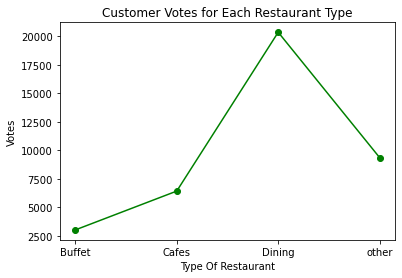

In [13]:
plt.plot(result, marker="o", color= "green")
plt.xlabel("Type Of Restaurant")
plt.ylabel("Votes")
plt.title("Customer Votes for Each Restaurant Type")
plt.show()

✅ Insight: `Dining` restaurants have received maximum votes (over 20k), while `Buffet` restaurants have received minimum votes (around 3k).

### Q3: What are the ratings that the majority of restaurants have received?

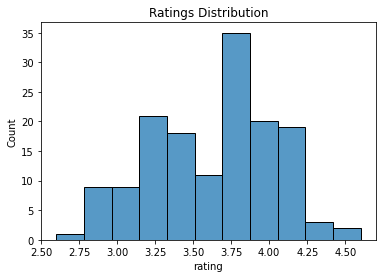

In [14]:
sns.histplot(data = df, x="rate", bins=11)
plt.xlabel("rating")
plt.title("Ratings Distribution")
plt.show()

✅ Insight: The majority of restaurants received ratings ranging between 3.25 and 4.25.

### Q4: Zomato has observed that most couples order most of their food online. What is their average spending on each order?

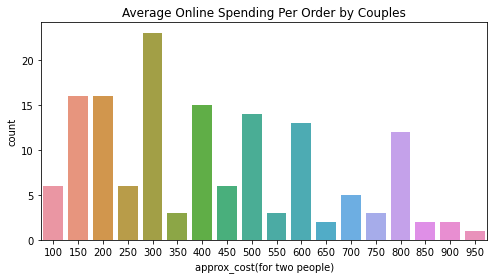

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="approx_cost(for two people)")
plt.title("Average Online Spending Per Order by Couples")
plt.show()

✅ Insight: The majority of couples spend an average of Rs.300 on a single online order.

### Q5: Which mode (online or offline) has received the maximum rating?

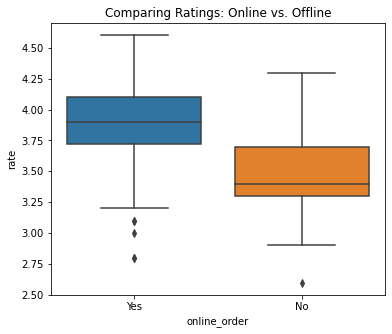

In [16]:
plt.figure(figsize=(6,5))
sns.boxplot(data = df, x = "online_order", y = "rate")
plt.title("Comparing Ratings: Online vs. Offline")
plt.show()

✅ Insight: `Offline` orders received lower ratings in comparison to `Online` orders, which received excellent ratings.

### Q6: Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [18]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

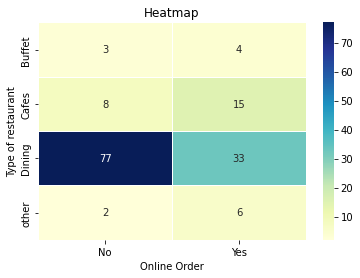

In [22]:
sns.heatmap(pivot_table, cmap = 'YlGnBu', annot = True, fmt='d', linewidth = 1)
plt.xlabel("Online Order")
plt.ylabel("Type of restaurant")
plt.title("Heatmap")
plt.show()

✅ Insight: Dining restaurants primarily receive offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer ordering online at cafes.

## 📊 Summary of Insights

- `Restaurant Type Preference`: The majority of restaurants fall under the Dining category, indicating it's the most preferred format among customers.

  
- `Engagement by Type`: Dining restaurants receive the highest number of votes (20k+), while Buffet restaurants receive the least (~3k), suggesting stronger customer engagement with dining formats.

  
- `Rating Distribution`: Most restaurants have ratings between 3.25 and 4.25, reflecting moderate to good customer satisfaction.

  
- `Couples’ Spending Behavior`: The average online order by couples centers around ₹300, with the overall spending range spanning from ₹100 to ₹950. The most frequent spending range is ₹300–₹600, marking it as the sweet spot for pricing.

  
- `Order Mode vs Rating`: Online orders consistently receive higher ratings than offline orders, indicating better customer experience or convenience.

  
- `Order Mode by Restaurant Type`: Dining restaurants primarily receive offline orders, while cafes are more aligned with online ordering, reflecting distinct customer behaviors across formats.

##  Business Recommendations Based on Insights

<b>1. Focus on Dining Experience Quality:</b> 
   - Since dining restaurants are most popular and receive the highest engagement, enhancing the offline experience—ambience, service, and comfort—can further boost ratings and loyalty.


<b>2. Boost Online Presence for Cafes:</b>
   - Cafes thrive in the online space. Investing in digital marketing, app partnerships, and delivery optimization can amplify reach and ratings.


<b>3. Design Budget-Friendly Menus for Couples:</b> 
   - With ₹300–₹600 as the most frequent spending range and ₹300 as the peak, restaurants should offer curated couple combos or value meals within this bracket to attract repeat orders.


<b>4. Encourage Online Ordering Across All Types:</b>
   - Given that online orders receive better ratings, even dining and buffet restaurants should consider hybrid models (e.g., takeaway, delivery) to improve reach and satisfaction.


<b>5. Reevaluate Buffet Strategy:</b>
   - Buffet restaurants show low engagement—consider rebranding, offering flexible - pricing, or integrating online booking to improve visibility and appeal.


<b>6. Segment Marketing by Type and Mode:</b>
   - Use insights to tailor promotions: push dine-in offers for restaurants, and digital campaigns for cafes. Align messaging with customer behavior patterns.

## Conclusion
The “Zomato Restaurant Analysis for Consumer Behavior and Service Optimization” case study underscores the importance 
of data in understanding customer preferences and operational dynamics. By analyzing restaurant types, order modes, 
ratings, and spending behavior, Zomato can tailor its services to meet consumer expectations, enhance user satisfaction, 
and strengthen its position in a competitive food delivery market.